In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import csv
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')


# Pre processing

In [5]:
dataset = pd.read_csv("../input/titanic/train.csv")
TestDataset = pd.read_csv("../input/titanic/test.csv")
def uniquify_me(*lister):
    auxiliaryList = []

    for word in lister:

        if word not in auxiliaryList:
            
            auxiliaryList.append(word)

    return auxiliaryList
def DataPreProcessing():                    
	
    global dataset
    global TestDataset
    fillNa_value = np.float(0.0)
    
    # TestDataset = TestDataset.loc[:, TestDataset.columns != 'PassengerId']
#     TestDataset = TestDataset.loc[:, TestDataset.columns != 'Cabin']
#     TestDataset = TestDataset.loc[:, TestDataset.columns != 'Embarked']
#     TestDataset = TestDataset.loc[:, TestDataset.columns != 'Ticket']
#     TestDataset = TestDataset.loc[:, TestDataset.columns != 'Pclass']
    # TestDataset = TestDataset.loc[:, TestDataset.columns != 'Fare']

    # ########   ##############  >>>>>>>>>>  Filling Na by Mean <<<<<<<<<<<<<<<
    
    TestDataset['Embarked'].fillna('S',inplace=True)
    TestDataset['Pclass'].fillna(3,inplace=True)
    TestDataset['Fare'].fillna(TestDataset['Fare'].mean(),inplace=True)

    dataset['Embarked'].fillna('S',inplace=True)
    dataset['Pclass'].fillna(3,inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].mean(),inplace=True)

    TestDataset.fillna(fillNa_value,inplace=True)
    dataset.fillna(fillNa_value,inplace=True)
 
    #############################################################################



    # for abc in TestDataset["Age"]:
    # print(type(fillNa_value))
    # for x in TestDataset["Age"]:
    # 	print(type(x))
    # 	exit()
    # kill = 
    ##############################  Family as feature #######################
    
    TestDataset['Family'] = TestDataset['SibSp'] + TestDataset['Parch'] + 1
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1

    ##################################### Dealing with Tickets #########################################
#     '''
    index = 0

    num = 1
    a = 0
    tiketo = pd.DataFrame(columns = TestDataset["Ticket"])

    while(a < len(TestDataset["Ticket"])):
    	b = a+1
    	while(b < len(TestDataset["Ticket"])-1):
    		if(TestDataset["Ticket"][a] == TestDataset["Ticket"][b]):
    			TestDataset["Ticket"][b] = num
    		b+=1
    	a+=1
    	num+=1

    index = 0

    for a in TestDataset["Ticket"]:
    	if(type(a) == type("asdkjb")):
    		TestDataset["Ticket"][index] = num
    		num += 1
    	index += 1


    index = 0

    num = 1
    a = 0
    tiketo = pd.DataFrame(columns = dataset["Ticket"])

    while(a < len(dataset["Ticket"])):
    	b = a+1
    	while(b < len(dataset["Ticket"])-1):
    		if(dataset["Ticket"][a] == dataset["Ticket"][b]):
    			dataset["Ticket"][b] = num
    		b+=1
    	a+=1
    	num+=1

    index = 0

    for a in dataset["Ticket"]:
    	if(type(a) == type("asdkjb")):
    		dataset["Ticket"][index] = num
    		num += 1
    	index += 1


    # ................................................................................................
    a = 0

    while(a < len(dataset["Ticket"])):
    	b = a+1
    	while(b < len(dataset["Ticket"])-1):
    		if(dataset["Ticket"][a] == dataset["Ticket"][b]):
    			dataset["Ticket"][b] = num
    		b+=1
    	a+=1
    	num+=1

    index = 0

    for a in dataset["Ticket"]:
    	if(type(a) == type("asdkjb")):
    		dataset["Ticket"][index] = num
    		num += 1
    	index += 1
        # '''

        ############################# Adressing Missing Ages ########################################
    
    
    index = 0
    for age,sex,name,spo in zip(TestDataset["Age"],TestDataset["Sex"],TestDataset["Name"],TestDataset["SibSp"]) :
        if( sex == 'female'):
            if "Mrs." in name:
                if age == fillNa_value:
                    TestDataset["Age"][index] = 33.5

            elif "Miss" in name:
                if age == fillNa_value:
                    TestDataset["Age"][index]  = 17.8

        else:
            if "Mr." in name:
                if age == fillNa_value:
                    TestDataset["Age"][index]  = 23.3
                    
        index += 1


    index = 0
    for age,sex,name,spo in zip(dataset["Age"],dataset["Sex"],dataset["Name"],dataset["SibSp"]) :
        if( sex == 'female'):
            if "Mrs." in name:
                if age == fillNa_value:
                    dataset["Age"][index] = 33.5
            elif "Miss" in name:

                if age == fillNa_value:
                    dataset["Age"][index]  = 17.8

        else:
            if "Mr." in name:
                
                if age == fillNa_value:
                    dataset["Age"][index]  = 23.3


    for xyz,sex in zip(TestDataset["Name"],TestDataset["Sex"]):
        if "Mr." in xyz:
            TestDataset.replace(xyz,1,inplace = True)
        elif("Mrs." in xyz):
            TestDataset.replace(xyz,2,inplace = True)
        elif("Miss." in xyz):
            TestDataset.replace(xyz,3,inplace = True)	
        elif("Don." in xyz):
            TestDataset.replace(xyz,4,inplace = True)	
        elif("Dr." in xyz):
            if sex == "male" :
                TestDataset.replace(xyz,5,inplace = True)
            else:
                TestDataset.replace(xyz,6,inplace = True)
        elif("Ms." in xyz):
            TestDataset.replace(xyz,7,inplace = True)
        elif("Lady." in xyz):
            TestDataset.replace(xyz,8,inplace = True)
        elif("Capt." in xyz):
            TestDataset.replace(xyz,9,inplace = True)
        elif("Master." in xyz):
            TestDataset.replace(xyz,10,inplace = True)
        elif("Dona." in xyz):
            TestDataset.replace(xyz,11,inplace = True)
        elif("Col." in xyz):
            TestDataset.replace(xyz,12,inplace = True)		
        elif("Rev." in xyz):
            TestDataset.replace(xyz,13,inplace = True)
        elif("Mme." in xyz):
            TestDataset.replace(xyz,14,inplace = True)
        elif("Major." in xyz):
            TestDataset.replace(xyz,15,inplace = True)
        elif("Sir." in xyz):
            TestDataset.replace(xyz,16,inplace = True)
        elif("Mlle." in xyz):
            TestDataset.replace(xyz,17,inplace = True)
        elif("Countess." in xyz):
            TestDataset.replace(xyz,18,inplace = True)
        elif("Jonkheer." in xyz):
            TestDataset.replace(xyz,19,inplace = True)				
        else:
            TestDataset.replace(xyz,0,inplace = True)


    TestDataset.replace('male',1,inplace=True)
    TestDataset.replace('female',2,inplace=True)
    TestDataset.replace('Q',1,inplace=True)
    TestDataset.replace('S',2,inplace=True)
    TestDataset.replace('C',3,inplace=True)


    dataset.fillna(fillNa_value,inplace=True)
    dataset = dataset.loc[:, dataset.columns != 'PassengerId']
#     dataset = dataset.loc[:, dataset.columns != 'Cabin']
#     dataset = dataset.loc[:, dataset.columns != 'Embarked']
#     dataset = dataset.loc[:, dataset.columns != 'Ticket']
#     dataset = dataset.loc[:, dataset.columns != 'Pclass']
    # dataset = dataset.loc[:, dataset.columns != 'Fare']



#     '''
    # Dealing with Cabin column
    lister = []	
    # TestDataset["Cabin"].fillna(0,inplace = True)
    for x in TestDataset["Cabin"] :
    	if x == fillNa_value:
    		pass
    	else:
    		lister.append(x)

    for x in dataset["Cabin"] :
    	if x == fillNa_value:
    		pass
    	else:
    		lister.append(x)

    lister = uniquify_me(*lister)
    number = 1
    for cabin in lister:
    	TestDataset.replace(cabin,number,inplace  = True)
    	dataset.replace(cabin,number,inplace  = True)
    	number += 1
#     '''

    for xyz,sex in zip(dataset["Name"],dataset["Sex"]):

        if("Mr." in xyz):
            dataset.replace(xyz,1,inplace = True)
        elif("Mrs." in xyz):
            dataset.replace(xyz,2,inplace = True)
        elif("Miss." in xyz):
            dataset.replace(xyz,3,inplace = True)	
        elif("Don." in xyz):
            dataset.replace(xyz,4,inplace = True)	
        elif("Dr." in xyz):
            if sex == "male" :
                dataset.replace(xyz,5,inplace = True)
            else:
                dataset.replace(xyz,6,inplace = True)
        elif("Ms." in xyz):
            dataset.replace(xyz,7,inplace = True)
        elif("Lady." in xyz):
            dataset.replace(xyz,8,inplace = True)
        elif("Capt." in xyz):
            dataset.replace(xyz,9,inplace = True)
        elif("Master." in xyz):
            dataset.replace(xyz,10,inplace = True)
        elif("Dona." in xyz):
            dataset.replace(xyz,11,inplace = True)
        elif("Col." in xyz):
            dataset.replace(xyz,12,inplace = True)		
        elif("Rev." in xyz):
            dataset.replace(xyz,13,inplace = True)	
        elif("Mme." in xyz):
            dataset.replace(xyz,14,inplace = True)
        elif("Major." in xyz):
            dataset.replace(xyz,15,inplace = True)
        elif("Sir." in xyz):
            dataset.replace(xyz,16,inplace = True)
        elif("Mlle." in xyz):
            dataset.replace(xyz,17,inplace = True)
        elif("Countess." in xyz):
            dataset.replace(xyz,18,inplace = True)
        elif("Jonkheer." in xyz):
            dataset.replace(xyz,19,inplace = True)			
        else:
            dataset.replace(xyz,0,inplace = True)


    dataset.replace('male',1,inplace=True)
    dataset.replace('female',2,inplace=True)
    dataset.replace('Q',1,inplace=True)
    dataset.replace('S',2,inplace=True)
    dataset.replace('C',3,inplace=True)

    dataset['Fare']	= dataset['Fare']/(dataset['SibSp']+dataset['Parch']+1)
    TestDataset['Fare']	= TestDataset['Fare']/(TestDataset['SibSp']+TestDataset['Parch']+1)
        
        
        # AGE Divided by 100
    # TestDataset["Age"] = TestDataset["Age"]
    # dataset["Age"] = dataset["Age"]

    # dataset = dataset.loc[:, dataset.columns != 'Parch']
    # TestDataset = TestDataset.loc[:, TestDataset.columns != 'Parch']
    # dataset = dataset.loc[:, dataset.columns != 'SibSp']
    # TestDataset = TestDataset.loc[:, TestDataset.columns != 'SibSp']

    ############################################## Saving all the processed data #################################################

    # print(TestDataset.describe())

    # TestDataset = TestDataset.loc[:, TestDataset.columns != 'Parch']
    # TestDataset = TestDataset.loc[:, TestDataset.columns != 'SibSp']
    # dataset = dataset.loc[:, dataset.columns != 'Parch']
    # dataset = dataset.loc[:, dataset.columns != 'SibSp']
    
#     for a in ['Age','SibSp','Parch','Fare']:
#         TestDataset[a] = Remove_Outliers(TestDataset[a])
#         dataset[a] = Remove_Outliers(dataset[a] )

    print('done---------------------------------------------')




    # exit()

    TestDataset.to_csv("file_name_Test.csv", sep=',')
    dataset.to_csv("file_name_train.csv", sep=',')

    dataset = pd.read_csv("file_name_train.csv")
    TestDataset = pd.read_csv("file_name_Test.csv")

    print("new file written")


    ##############################################################################################################################

    X = dataset.loc[:, dataset.columns != 'Survived']
    Y = dataset['Survived']	

    X_Test = TestDataset.loc[:, TestDataset.columns != 'Survived']

    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 12)

    # print(dataset.head())

    print("\n\npreprocessing done\n\n ")
    return X_train,X_test,y_train,y_test,X,Y,X_Test
DataPreProcessing()

done---------------------------------------------
new file written


preprocessing done

 


(array([[0.93483146, 1.        , 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.43932584, 1.        , 0.        , ..., 0.        , 0.5       ,
         0.        ],
        [0.55842697, 1.        , 0.        , ..., 0.        , 0.5       ,
         0.        ],
        ...,
        [0.43820225, 0.        , 0.        , ..., 0.67741935, 0.5       ,
         0.3       ],
        [0.7494382 , 1.        , 0.        , ..., 0.        , 0.5       ,
         0.        ],
        [0.94719101, 1.        , 0.        , ..., 0.        , 1.        ,
         0.        ]]),
 array([[0.51235955, 0.        , 0.        , ..., 0.70967742, 0.5       ,
         0.        ],
        [0.39438202, 0.        , 0.        , ..., 0.66129032, 0.5       ,
         0.        ],
        [0.19438202, 1.        , 0.        , ..., 0.        , 0.5       ,
         0.        ],
        ...,
        [0.72696629, 0.        , 0.61111111, ..., 0.84408602, 1.        ,
         0.        ],
        [0.9

# Load data

In [6]:
def Read_the_processed_data():

    dataset = pd.read_csv("file_name_train.csv")
    TestDataset = pd.read_csv("file_name_Test.csv")
    ''',index_col="Age"
    ,index_col="Age"'''
    del TestDataset['Unnamed: 0']
    del dataset['Unnamed: 0']
    X_Test = TestDataset.loc[:, TestDataset.columns != 'Survived']

    print("reading done")

    # print(dataset.head())

    X = dataset.loc[:, dataset.columns != 'Survived']
    Y = dataset['Survived']	
    '''
    print("shapes before and after transformation")
    print(X.shape)

    clf = RandomForestClassifier(
                                n_estimators = 300,
                                max_depth = 15, 
                                random_state = 15,
                                max_features = 4,
                                max_leaf_nodes = 60
                                )
    clf = clf.fit(X, Y)

    model = SelectFromModel(clf, prefit=True)
    X_new = model.transform(X)
    print(X_new)
    # X_new_TestDataset = model.transform(X_Test)
    exit()

    
    TestDataset = X_new_TestDataset
    X = X_new
    print(X.shape)
    '''

    
    X_train,X_test,y_train,y_test = train_test_split(
                                                        X,Y,
                                                        test_size = 0.3,
                                                        random_state = 12
                                                        )


    return X_train,X_test,y_train,y_test,X,Y,X_Test

Read_the_processed_data()

reading done


(     Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  Embarked  \
 832       3     1    1   0.0      0      0    1534   7.2292    0.0         3   
 391       3     1    1  21.0      0      0    1227   7.7958    0.0         2   
 497       3     1    1   0.0      0      0    1309  15.1000    0.0         2   
 398       2     5    1  23.0      0      0    1232  10.5000    0.0         2   
 70        2     1    1  32.0      0      0     961  10.5000    0.0         2   
 ..      ...   ...  ...   ...    ...    ...     ...      ...    ...       ...   
 241       3     3    2   0.0      1      0    1107   7.7500    0.0         1   
 253       3     1    1  30.0      1      0    1118   8.0500    0.0         2   
 390       1     1    1  36.0      1      2    1226  30.0000  126.0         2   
 667       3     1    1   0.0      0      0    1427   7.7750    0.0         2   
 843       3     1    1  34.5      0      0    1542   6.4375    0.0         3   
 
      Family  
 832       

In [19]:
X_train,X_test,y_train,y_test,X,Y,X_Test = Read_the_processed_data()
To_pred = X_Test["PassengerId"]
X_Test = X_Test.loc[:,X_Test.columns != 'PassengerId']

X.shape

reading done


(891, 11)

# Creating our model to classify

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(11, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(50, activation='relu'), 
#     layers.BatchNormalization(),
#     layers.Dropout(0.3),
    layers.Dense(50, activation='relu'), 
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X[0:600], Y[0:600],
    validation_data=(X[600:891], Y[600:891]),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping]
)

Epoch 1/1000
2/2 [==============================] - 0s 116ms/step - loss: 0.8527 - binary_accuracy: 0.4867 - val_loss: 0.6512 - val_binary_accuracy: 0.6564
Epoch 2/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.8418 - binary_accuracy: 0.5033 - val_loss: 0.6102 - val_binary_accuracy: 0.6598
Epoch 3/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.8615 - binary_accuracy: 0.4867 - val_loss: 0.6060 - val_binary_accuracy: 0.6632
Epoch 4/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.8568 - binary_accuracy: 0.5250 - val_loss: 0.6088 - val_binary_accuracy: 0.6667
Epoch 5/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.7882 - binary_accuracy: 0.5300 - val_loss: 0.6146 - val_binary_accuracy: 0.6701
Epoch 6/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.7870 - binary_accuracy: 0.5183 - val_loss: 0.6202 - val_binary_accuracy: 0.6770
Epoch 7/1000
2/2 [==============================] - 0s 11ms/step - lo

Best Validation Loss: 0.6060
Best Validation Accuracy: 0.6838


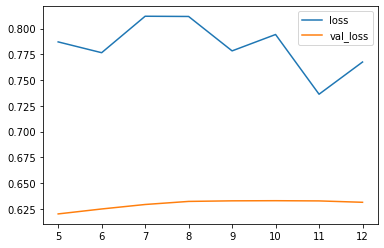

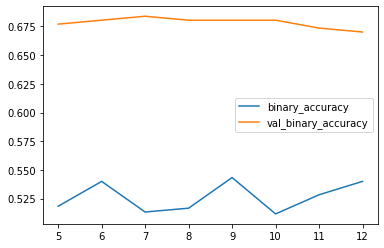

In [38]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [ ]:

PId = To_pred
print("here you go --------------------------- ")
print(To_pred.shape)
pred = TrainMeFinally()
print(pred.shape)
# exit()
# Start writing it to a csv file
with open('innovators.csv', 'w', newline='') as file:
	writer = csv.writer(file)
	# print(map(lambda x:[x], pred))
	zipped_lists=zip(PId,pred)
	writer.writerow(('PassengerId','Survived'))
	for row in zipped_lists:
		writer.writerow(row)


print("done")